# Usage example for the DASH tree

## Import and initialize the DASH tree

In [7]:
from rdkit import Chem
from tqdm import tqdm
from serenityff.charge.tree.dash_tree import DASHTree
from serenityff.charge.tree.atom_features import AtomFeatures

The default dash tree is stored in the data folder, and is used if no other tree path is specified when loading the tree

In [8]:
tree = DASHTree()

Loading DASH tree data


We can load an example sdf file to get some molecules to work with

In [9]:
mol_sup = Chem.SDMolSupplier("../data/example.sdf", removeHs=False)

## Use the DASH tree

With the following line we can get the partial charge for each atom in the molecule

In [11]:
tree.get_molecules_partial_charges(mol_sup[4])["charges"]

[-0.5931196730441903,
 0.7851668913312818,
 -0.6431413414085979,
 -0.015186619325404951,
 -0.17372044416049043,
 -0.08634567360691903,
 -0.13202160869163443,
 0.14872200355130397,
 -0.5883753153625102,
 0.1707070137686761,
 -0.42315670330341354,
 0.5095730476572767,
 0.19047164368866124,
 0.16725630351830967,
 0.18996089087651563,
 0.49320958451113567]

the tree provides a visualization, explaining the assignment process, and showing the matched fragment.

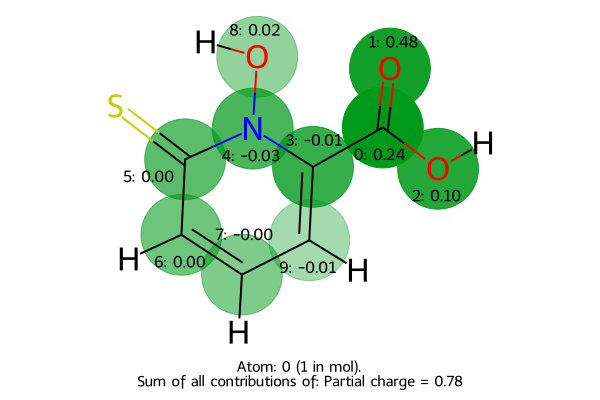

In [15]:
tree.explain_property(mol=mol_sup[4], atom=1)

The raw matching function is also available, and can be used to get more information about the nodes matched

In [17]:
node_path = tree.match_new_atom(0, mol_sup[0])
print(node_path)

[34, 0, 167331, 167332, 167333, 169504, 170309, 170536, 170727, 170731, 170732, 170734]


The first element of 'node_path' is the branch index and can be used to select the correct branch , while all the following numbers are the indices of the nodes matched in the subgraph. We can use these indices to get the corresponding nodes from the tree

In [21]:
branch_idx = node_path[0]
node_idx = node_path[1]

example_node = tree.tree_storage[branch_idx][node_idx]
example_node_data = tree.data_storage[branch_idx].iloc[node_idx]

Each node stores the information about the atom and the connectivity of the fragment

In [23]:
n_idx, n_af_key, n_connectivity, n_con_type, attention, children = example_node

A human readable form of the atom type can be obtained with the following function

In [28]:
print("Element, #bonds, charge, isConj., #Hs")
print(AtomFeatures.tuple_to_string(AtomFeatures.lookup_int(n_af_key)))

Elementt, #bonds, charge, isConj., #Hs
C 4 0 False 3
